# Import dataset - Boston house price dataset

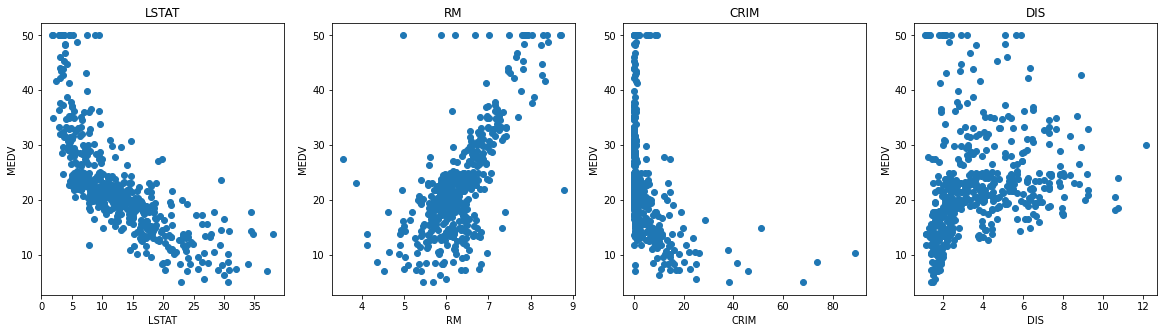

In [33]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
from sklearn import metrics

%matplotlib inline

from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM','CRIM','DIS']
target = boston_dataset.target

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [34]:
from sklearn import preprocessing
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

# Standardize the variables
# It is not necessary to standardize the target. I do it just for convenience.
X_scaled = pd.DataFrame(preprocessing.scale(boston))
Y_scaled = preprocessing.scale(boston_dataset.target)
X_scaled.columns = boston.columns

# OLS Regression

R2 score is 0.73


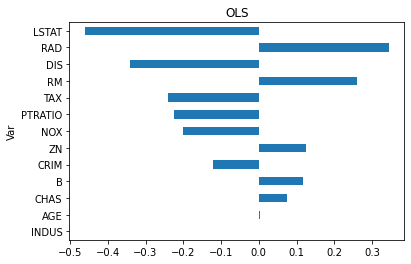

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size = 0.2, random_state=5)

OLS = LinearRegression()
OLS.fit(X_train, Y_train)

# model evaluation for testing set
y_test_predict = OLS.predict(X_test)
r2 = metrics.r2_score(Y_test, y_test_predict).round(2)
print('R2 score is {}'.format(r2) )

# Plot the coefficients in descending order
w = pd.DataFrame()
w['Var'] = X_train.columns
w = w.set_index('Var') # Set the variable names as the index
w['beta'] = OLS.coef_
w['beta_abs'] = np.abs(w['beta']) # Get the absolute value for ranking
w = w.sort_values(by='beta_abs')
w['beta'].plot.barh()
plt.title('OLS')
fig.tight_layout()
plt.show()

# Quantile Regression

In [36]:
import statsmodels.regression.quantile_regression as Q_reg
import matplotlib.pyplot as plt

quantiles = [0.01, 0.05, 0.50, 0.95 , 0.99]

# Get the model, and the cofficients in (a) - (b)
def Qreg(q):
   # (a) Modeling 
   mod = Q_reg.QuantReg(Y_train, X_train).fit(q=q)
    
   # (b) Get the coefficients and the lower and upper bounds
   coefs = pd.DataFrame()
   coefs['param'] = mod.params
   coefs = pd.concat([coefs,mod.conf_int()],axis=1) # "mod.conf_int" will give the lower and upper bounds
   coefs['q'] = q
   coefs.columns = ['beta','beta_lower','beta_upper','quantile']
    
   return coefs

Qreg_coefs = pd.DataFrame()
for q in quantiles:
    coefs = Qreg(q)
    Qreg_coefs = pd.concat([Qreg_coefs,coefs])

# Get the R-squared for Q=0.5
q = 0.5
Y_test_pred = Q_reg.QuantReg(Y_train, X_train).fit(q=q).predict(X_test)
r2 = metrics.r2_score(Y_test,Y_test_pred)
print('R2 score is {}'.format(r2) ) # 0.75

R2 score is 0.7536284701070408


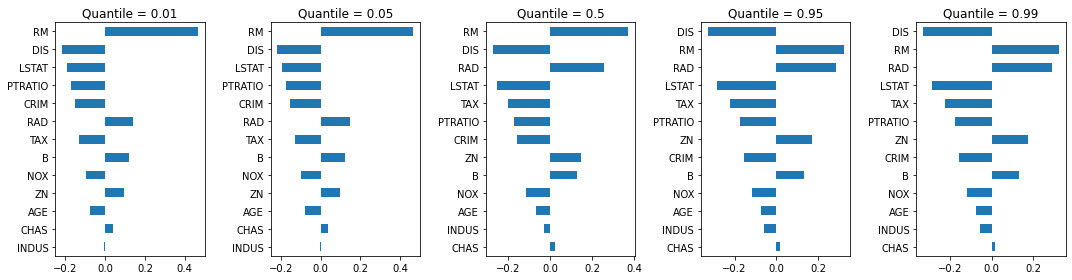

In [37]:
# Get the absolute value of the coefficients for ranking
Qreg_coefs['beta_abs'] = np.abs(Qreg_coefs['beta'] ) 
Qreg_coefs = Qreg_coefs.sort_values(by=['quantile','beta_abs'])

fig = plt.figure(figsize=(15, 4))

n = len(quantiles)

for i in range(n):
    plt.subplot(1, n, i+1)
    w = Qreg_coefs[Qreg_coefs['quantile']==quantiles[i]]
    w['beta'].plot.barh()
    plt.title('Quantile = ' + str(quantiles[i] ))

fig.tight_layout()
plt.show()

In [3]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
